In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [74]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [77]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [78]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

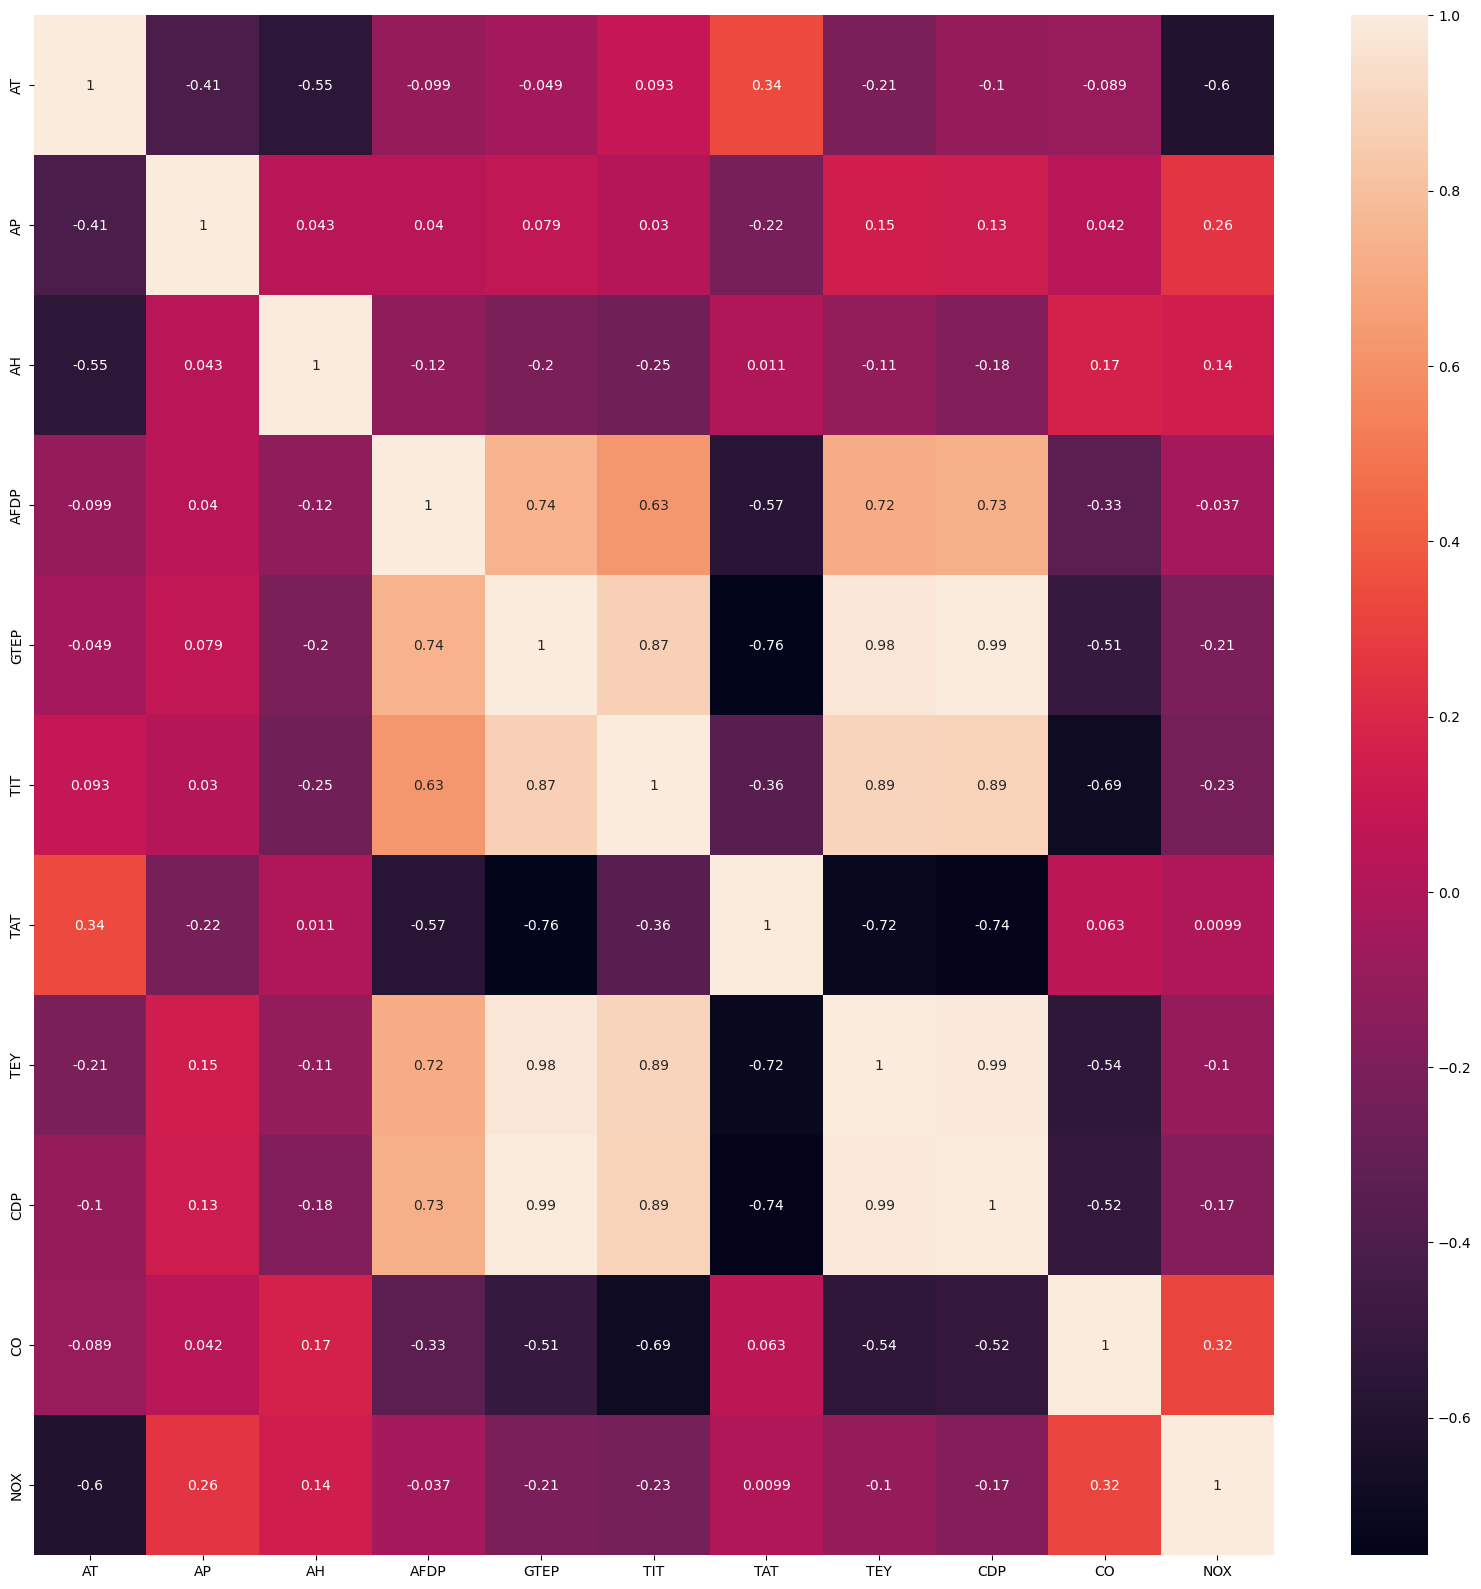

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [80]:
#selecting best features
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression 

In [81]:
x = df.drop(['TEY'], axis=1)
y = df[['TEY']]

In [82]:
best_features = SelectKBest(score_func=mutual_info_regression, k='all')
fit = best_features.fit(x,y)

In [83]:
scores = fit.scores_
features = fit.transform(x)

In [84]:
scores_df = pd.DataFrame(list(zip(scores, x.columns)), columns=['Score','Feature'])
scores_df.sort_values(by='Score', ascending = False, inplace=True)
scores_df

,Score,Feature
7,1.712468,CDP
4,1.600645,GTEP
5,1.325289,TIT
6,0.895768,TAT
3,0.660717,AFDP
8,0.512543,CO
0,0.412721,AT
9,0.300654,NOX
1,0.137436,AP
2,0.097517,AH


In [85]:
df2 = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT','TEY']]
df2.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [86]:
#applying standardScalar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2.values)
df_new = pd.DataFrame(df_scaled, columns=[df2.columns])
df_new

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909
...,...,...,...,...,...,...,...,...
15034,-1.543161,-1.498657,-2.063184,0.103453,-0.865850,1.145792,-1.153182,-1.426381
15035,-1.513247,-1.438759,-2.268905,-0.276638,-0.913470,1.293578,-1.303986,-1.415642
15036,-1.467922,-1.410967,-2.789257,-1.026650,-0.951488,2.695925,-1.386267,-1.516089
15037,-1.422598,-1.447624,-2.456474,-0.528337,-0.988848,1.924683,-1.420423,-1.481343


In [87]:
df_new.describe()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,3.640356e-16,1.107344e-16,-2.324212e-15,1.744899e-15,3.810001e-16,1.953355e-17,-2.320107e-16,1.406445e-15
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.992416e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-2.779497e+00,-8.874862e-01,-2.276462e+00,-2.149097e+00
25%,-4.354335e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-6.266930e-01,-5.015202e-01,-8.392292e-01,-3.919003e-01
50%,-7.011925e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-1.854065e-02,-2.620452e-01,5.566605e-02,-2.580448e-02
75%,4.311680e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.612196e-01,8.455882e-02,8.051309e-01,4.236815e-01
max,2.700105e+00,2.871006e+00,1.028678e+00,6.627839e-01,4.486233e+00,1.895949e+01,2.266234e+00,2.553607e+00


In [88]:
x = df_new.drop(['TEY'], axis=1)
y = df_new[['TEY']]

In [89]:
# Create model
model = Sequential()
model.add(Dense(12, input_dim=7,  activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_absolute_error"])

In [91]:
results= model.fit(x, y, validation_split=0.2, epochs= 100, batch_size=10 )

Epoch 1/100
1204/1204 [==============================] - 4s 2ms/step - loss: 0.5655 - mean_absolute_error: 0.5087 - val_loss: 0.6835 - val_mean_absolute_error: 0.5537
Epoch 2/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5292 - mean_absolute_error: 0.4590 - val_loss: 0.6831 - val_mean_absolute_error: 0.5525
Epoch 3/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5285 - mean_absolute_error: 0.4565 - val_loss: 0.6824 - val_mean_absolute_error: 0.5499
Epoch 4/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5280 - mean_absolute_error: 0.4547 - val_loss: 0.6820 - val_mean_absolute_error: 0.5480
Epoch 5/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.5277 - mean_absolute_error: 0.4536 - val_loss: 0.6819 - val_mean_absolute_error: 0.5476
Epoch 6/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.5276 - mean_absolute_error: 0.4531 - val_loss: 0.6819 - val_mean_absolute_error: 0.547

Epoch 50/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.4499 - val_loss: 0.6815 - val_mean_absolute_error: 0.5454
Epoch 51/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.4499 - val_loss: 0.6815 - val_mean_absolute_error: 0.5450
Epoch 52/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.4499 - val_loss: 0.6815 - val_mean_absolute_error: 0.5449
Epoch 53/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.4500 - val_loss: 0.6815 - val_mean_absolute_error: 0.5454
Epoch 54/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.4499 - val_loss: 0.6814 - val_mean_absolute_error: 0.5446
Epoch 55/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5271 - mean_absolute_error: 0.4499 - val_loss: 0.6817 - val_mean_absolute_error:

Epoch 99/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.5270 - mean_absolute_error: 0.4496 - val_loss: 0.6814 - val_mean_absolute_error: 0.5444
Epoch 100/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.5270 - mean_absolute_error: 0.4496 - val_loss: 0.6814 - val_mean_absolute_error: 0.5448


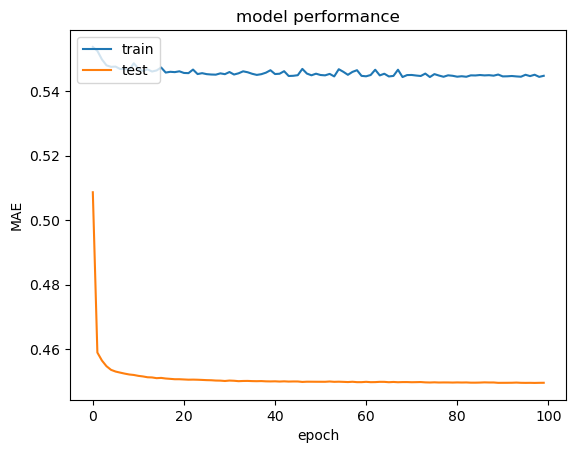

In [92]:
# Model performance
plt.plot(results.history['val_mean_absolute_error'])
plt.plot(results.history['mean_absolute_error'])
plt.title('model performance')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

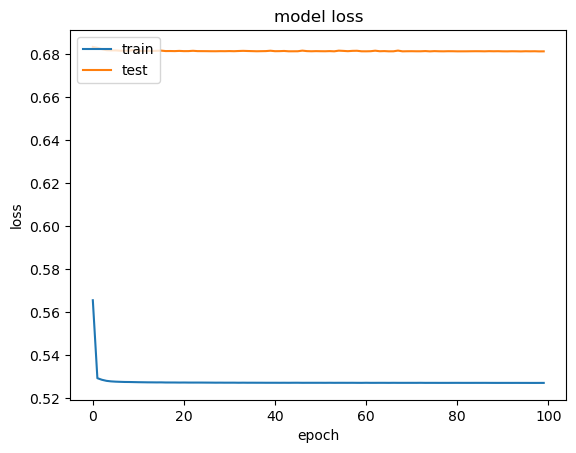

In [93]:
# History of loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()